In [30]:
import numpy as np
import matplotlib.pyplot as plt
import neurokit2 as nk
import tensorflow as tf
import os
from tensorflow import keras
import utils
from scipy.signal import resample, cheby1, filtfilt
from sklearn.preprocessing import MinMaxScaler

print(tf.version.VERSION)

2.12.0


In [11]:
# Data load & Get rid of corrupted labelled data frame
data = np.load("/home/yckim/research/ecg_id/dataset/icentia/raw/00000/00000_dataset.npz", allow_pickle = True)
ecg_sigs = data['data']
labels = data['labels'].item()
norm_b_indices = np.where(labels['beat_type'] == 1) # 1
norm_r_indices = np.where(labels['rhythm_type'] == 3) # 3

# 공통 요소 추출
common_elements = np.intersect1d(norm_b_indices, norm_r_indices)
ecg_norm_sigs = ecg_sigs[common_elements]
ecg_sig_len = 1250
ecg_norm_sigs_5s = ecg_norm_sigs[:,:ecg_sig_len].copy() # 모델이 5초간 잘라서 sqa 하는거라, 5초로 강제로 자르기

In [41]:
a = nk.ecg_peaks(ecg_norm_sigs_5s[0], sampling_rate=250)[1]
_, waves_peak = nk.ecg_delineate(ecg_norm_sigs_5s[0], sampling_rate=250, method="peak")

In [15]:
data = np.load("/home/yckim/research/ecg_id/dataset/icentia/processed_3/07221/07221.npz")

In [16]:
data["data"].shape

(88, 600)

In [166]:
def find_string_in_list(lst, target):
    for i, element in enumerate(lst):
        if target in element:  # 특정 문자열이 요소에 포함되어 있는지 확인
            return i
    return -1  # 문자열이 포함된 요소가 없으면 -1 반환

import wfdb
data_path_list = utils.path_finder("/home/yckim/research/ecg_id/dataset/PTB/original/", ".hea")
h_list = []
for head_path in data_path_list:
    rcrd = wfdb.rdrecord(os.path.splitext(head_path)[0])
    label = find_string_in_list(rcrd.comments, 'Healthy control')
    if label != -1:
        h_list.append(head_path)

base_save_dir = "/home/yckim/research/ecg_id/dataset/PTB/raw/"
for h_path in h_list:
    rcrd = wfdb.rdrecord(os.path.splitext(h_path)[0])
    lead_i_indx = rcrd.sig_name.index('i')
    lead_i_sig = rcrd.p_signal[:, lead_i_indx]
    save_dir = os.path.join(base_save_dir, h_path.split('/')[-2][-3:])
    utils.make_save_dir(save_dir)
    save_path = os.path.join(save_dir, rcrd.record_name)
    np.savez(save_path, data=lead_i_sig)

549 paths are found


In [167]:
lead_i_indx

0

In [53]:
h_list[0].split('/')[-2][-3:]

'252'

In [41]:
rcrd.p_signal
print(rcrd.record_name)
print(rcrd.n_sig)
print(rcrd.sig_name)
print(rcrd.comments)

s0487_re
15
['i', 'ii', 'iii', 'avr', 'avl', 'avf', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'vx', 'vy', 'vz']
['age: 54', 'sex: male', 'ECG date: 14/02/1997', 'Diagnose:', 'Reason for admission: Healthy control', 'Acute infarction (localization): no', 'Former infarction (localization): no', 'Additional diagnoses: no', 'Smoker: unknown', 'Number of coronary vessels involved: unknown', 'Infarction date (acute): n/a', 'Previous infarction (1) date: n/a', 'Previous infarction (2) date: n/a', 'Hemodynamics:', 'Catheterization date: n/a', 'Ventriculography: n/a', 'Chest X-ray: n/a', 'Peripheral blood Pressure (syst/diast): n/a', 'Pulmonary artery pressure (at rest) (syst/diast): n/a', 'Pulmonary artery pressure (at rest) (mean): n/a', 'Pulmonary capillary wedge pressure (at rest): n/a', 'Cardiac output (at rest): n/a', 'Cardiac index (at rest): n/a', 'Stroke volume index (at rest): n/a', 'Pulmonary artery pressure (laod) (syst/diast): n/a', 'Pulmonary artery pressure (laod) (mean): n/a', 'Pulmon

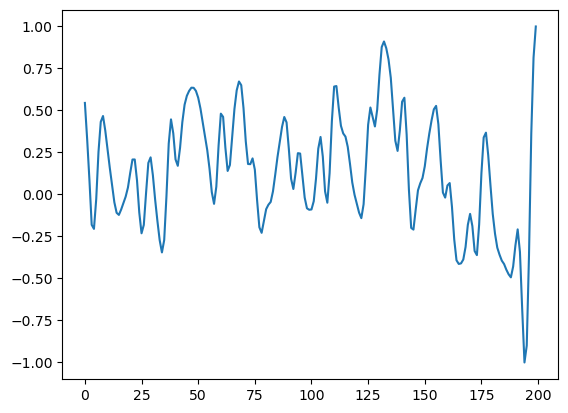

In [145]:
import numpy as np
import matplotlib.pyplot as plt
data = np.load("/home/jhhan/Downloads/ecg_id/data/template/2.npz", allow_pickle = True)
plt.plot(data["raw_data"][2])

In [123]:
import utils
template_list = utils.path_finder("/home/jhhan/Downloads/ecg_id/data/template/", '.npz')
template_data = []

for template in template_list:
    data = np.load(template, allow_pickle = True)["data"]
    template_data.append(data)
    


2 paths are found


In [40]:
target.shape

(24, 200)

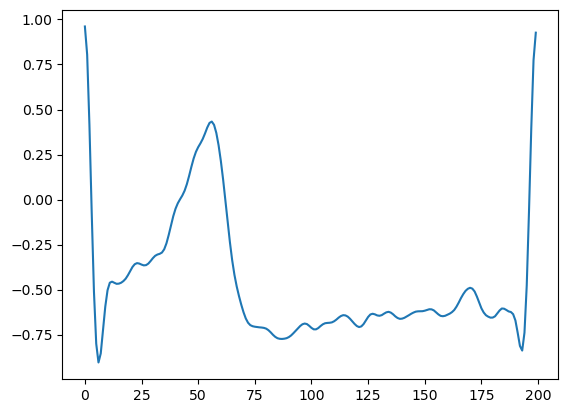

In [90]:
data = np.load("/home/jhhan/Downloads/ecg_id/data/template/1.npz", allow_pickle = True)
data2 = np.load("/home/jhhan/Downloads/ecg_id/data/template/2.npz", allow_pickle = True)
plt.plot(data["data"])
template = data["data"]
target = data["raw_data"]

# data2 = np.load("/home/jhhan/Downloads/ecg_id/data/template/2.npz", allow_pickle = True)
# target2 = data2["raw_data"][5]

In [99]:
def calculate_result(y_prob, threshold):
    y_prob_mean = np.mean(y_prob)
    likely = 0
    if y_prob_mean < threshold:
        likely = 0
    else:
        likely = 1
    return likely

In [105]:
targets.shape

(25, 200, 1)

In [104]:
templates.shape

(50, 200, 1)

2 paths are found
1/1 [==============================] - 0s 103ms/step
1
1/1 [==============================] - 0s 66ms/step
0


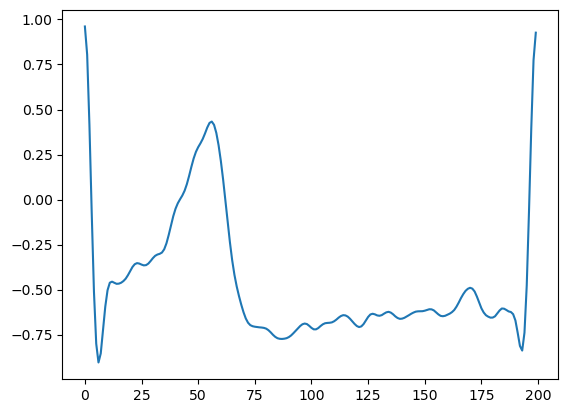

In [106]:
template_data_list = utils.path_finder("/home/jhhan/Downloads/ecg_id/data/template/", '.npz')
temp_target = target.reshape(-1,200,1)
data = np.load("/home/jhhan/Downloads/ecg_id/data/template/1.npz", allow_pickle = True)
data2 = np.load("/home/jhhan/Downloads/ecg_id/data/template/2.npz", allow_pickle = True)
plt.plot(data["data"])
template = data["data"]
target = data["raw_data"]


# targets = np.reshape(processed_sigs, (-1, 200, 1))

targets = np.reshape(target, (-1, 200, 1))
templates = np.empty((0, 200, 1))
for template in template_data_list:
    temp_template = np.load(template, allow_pickle=True)["data"]
    temp_template = np.reshape(temp_template, (1, 200, 1))
    for i in range(targets.shape[0]):
        templates = np.concatenate((templates, temp_template), axis = 0)
    y_prob = model.predict([templates, targets])
    templates = np.empty((0, 200, 1))
    print(calculate_result(y_prob, 0.8))

In [98]:
y_prob

array([[1.        ],
       [1.        ],
       [0.9999901 ],
       [0.99999917],
       [0.9999871 ],
       [0.99750024],
       [0.99990594],
       [0.99999905],
       [0.999759  ],
       [0.9999982 ],
       [0.9999999 ],
       [0.99997675],
       [0.95004827],
       [0.99999976],
       [0.9993531 ],
       [0.9999708 ],
       [0.9999999 ],
       [0.9998815 ],
       [0.99993646],
       [0.9999999 ],
       [0.99999833],
       [0.99999976],
       [0.9989718 ],
       [0.999985  ],
       [0.9999962 ],
       [0.5720653 ],
       [0.13864306],
       [0.00215201],
       [0.0746141 ],
       [0.06784437],
       [0.12706143],
       [0.22714877],
       [0.2748551 ],
       [0.4315909 ],
       [0.10732251],
       [0.6569003 ],
       [0.41103786],
       [0.04325442],
       [0.03929099],
       [0.531103  ],
       [0.5211627 ],
       [0.11049099],
       [0.8462452 ],
       [0.8218033 ],
       [0.5925318 ],
       [0.0115557 ],
       [0.04489569],
       [0.343

In [92]:
target_input.shape

(25, 200, 1)

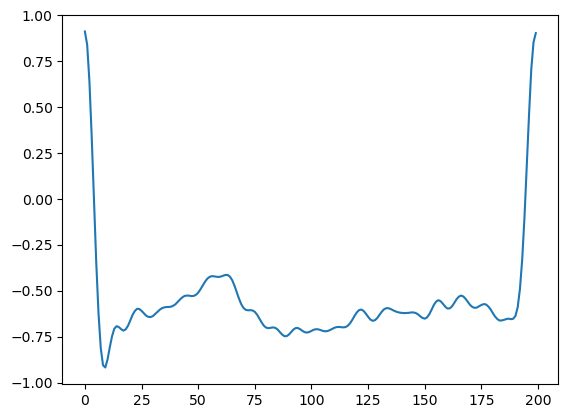

In [88]:
plt.plot(templates[25, :, :])

# Model Prediction

In [3]:
print(tf.__version__)


2.12.0


In [28]:
import argparse


In [37]:
model = model_loader.load_custom_model("/home/jhhan/Downloads/ecg_id/model/ecg_id_model.h5")

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 200, 1)]     0           []                               
                                                                                                  
 input_9 (InputLayer)           [(None, 200, 1)]     0           []                               
                                                                                                  
 model_4 (Functional)           (None, 200, 50)      5400        ['input_8[0][0]',                
                                                                  'input_9[0][0]']                
                                                                                                  
 lambda_2 (Lambda)              (None, 200, 50)      0           ['model_4[0][0]',          

In [33]:
import tensorflow as tf
import model_loader

model = model_loader.compile_model(args)
model.load_weights("/home/jhhan/Downloads/ecg_id/model/ecg_id_model.h5")

NameError: name 'args' is not defined

In [3]:
model.layers[2].summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 1)]          0         
                                                                 
 bidirectional (Bidirectiona  (None, 200, 50)          5400      
 l)                                                              
                                                                 
Total params: 5,400
Trainable params: 5,400
Non-trainable params: 0
_________________________________________________________________


In [25]:
a = np.load(sw_data_path, allow_pickle = True)

In [29]:
sw_data_path_list = utils.path_finder("/home/yckim/research/ecg_id/dataset/steering_wheel/raw/", 'npz')
sw_dataset = []
subject_id = []
for sw_data_path in sw_data_path_list:
    temp_data = np.load(sw_data_path, allow_pickle = True)['processed']
    sw_dataset.append(temp_data)

5 paths are found


In [177]:
# Chebyshev 대역통과 필터 설계 (0.5Hz ~ 40Hz)
lowcut = 0.5  # 낮은 차단 주파수 (0.5Hz)
highcut = 40  # 높은 차단 주파수 (40Hz)
ripple = 0.5  # 통과 대역 내 허용 리플(dB)
order = 4     # 필터 차수
fs = 2000

# Chebyshev Type I 필터 설계 (대역 통과)
nyquist = 0.5 * fs  # 나이퀴스트 주파수
low = lowcut / nyquist
high = highcut / nyquist
b, a = cheby1(order, ripple, [low, high], btype='band')

In [168]:
a = np.zeros((1, 1250, 1))
b = np.array([1,2,3,4,5]*250)
b = np.reshape(b, (1, 1250,1))

In [19]:
plt.plot(data)

NameError: name 'data' is not defined

In [184]:
# Preprocessing
# sliding window 방식을 이용해서 SQA 모델의 0을 받을 때까지 sliding
# 0되면 1250개 데이터 건너 뛰기

raw_ecg_sig = sw_dataset[0]

# 0. Filter 적용
filtered_sig = filtfilt(b, a, raw_ecg_sig)

# 0. Resmampling to 250Hz
fs_new = 250
fs_original = 2000
resamp_ecg_sig = np.reshape(resample(filtered_sig, int(len(filtered_sig) * fs_new / fs_original)), (-1, 1))

# 1. Min_Max normalization
scaler = MinMaxScaler(feature_range=(-1, 1))
normalized_ecg_sig = scaler.fit_transform(resamp_ecg_sig)

# 2. 5sec frame 당 SQA 적용
ecg_sqa_model_path = "/home/yckim/research/ecg_id/model/ecg_sqa/ecg_sqa.h5"
ecg_sqa_model = tf.keras.models.load_model(ecg_sqa_model_path)
norm_sig_list = []
corrupted_sig_list = []
predict_result = []
flg = True
i = 0
while flg:
    if filtered_sig.shape[0] - i < 1250:
        flg = False
        continue
    temp_frame = normalized_ecg_sig[i:i+1250]
    temp_frame = np.reshape(temp_frame, (1, 1250, 1))
    sqa = ecg_sqa_model.predict(temp_frame)
    if sqa[0, 0] < 0.5:
        norm_sig_list.append(temp_frame)
        predict_result.append(sqa[0,0])
        i += 1250
    else:
        corrupted_sig_list.append(temp_frame)
        i += 100

# plt.figure(figsize = (20,10))
# plt.plot(filtered_sig[:4000], c='k')
# plt.plot(sw_dataset[0][:4000])
# plt.show()

1/1 [==============================] - 0s 13ms/step


ValueError: cannot reshape array of size 231 into shape (1,1250,1)

In [67]:
def design_chebyshev_bandpass(lowcut, highcut, ripple, order, fs):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = cheby1(order, ripple, [low, high], btype='band')
    return b, a


def apply_bandpass_filter(signal, b, a):
    return filtfilt(b, a, signal)

def resample_signal(signal, fs_original, fs_new):
    return resample(signal, int(len(signal) * fs_new / fs_original))



def load_sqa_model(model_path):
    return tf.keras.models.load_model(model_path)

def apply_sqa_model(signal, model, frame_length=1250, step_size=100, threshold=0.5):
    norm_sig_list = []
    corrupted_sig_list = []
    predict_result = []

    i = 0
    while i + frame_length <= len(signal):
        temp_frame = signal[i:i+frame_length]
        temp_frame = np.reshape(temp_frame, (1, frame_length, 1))
        sqa = model.predict(temp_frame)

        if sqa[0, 0] < threshold:
            norm_sig_list.append(temp_frame)
            predict_result.append(sqa[0, 0])
            i += frame_length
        else:
            corrupted_sig_list.append(temp_frame)
            i += step_size

    return norm_sig_list, corrupted_sig_list, predict_result


def apply_sqa(signal, frame_length=1250, step_size=100):
    norm_sig_list = []
    corrupted_sig_list = []
    predict_result = []

    i = 0
    while (i + frame_length) <= len(signal):
        temp_frame = signal[i:i+frame_length]
        sqi = nk.ecg_quality(temp_frame, sampling_rate=250, method='zhao2018')
        if sqi != "Unacceptable":
            norm_sig_list.append(temp_frame)
            i += frame_length
        else:
            corrupted_sig_list.append(temp_frame)
            i += step_size

    return norm_sig_list, corrupted_sig_list, predict_result

def frame_cutter(norm_sig_list):
    """
    Frame Cutting according to ECG signal
    """
    pulses_per_frame = 1
    ecg_frame = []
    for norm_sig in norm_sig_list:
        raw_ecg_norm_5s = np.reshape(norm_sig, (-1,))
        try:
            temp_ecg_seg = raw_ecg_norm_5s
            r_peaks_indx = nk.ecg_peaks(temp_ecg_seg, sampling_rate=250)[1]["ECG_R_Peaks"]
            for i in range(0, len(r_peaks_indx)-pulses_per_frame, pulses_per_frame):
                r_peaks = r_peaks_indx[i:i+1+pulses_per_frame]
    
                    # 두 연속된 값의 차이가 60 ~ 300 사이에 있는지 확인
                if any(300 < (r_peaks[j+1] - r_peaks[j]) or (r_peaks[j+1] - r_peaks[j]) < 60 for j in range(pulses_per_frame)):
                    continue
                else:
                    temp_ecg_frame = temp_ecg_seg[r_peaks_indx[i]:r_peaks_indx[i+pulses_per_frame]+1]
                    ecg_resampled_frame = resample(temp_ecg_frame, 200*pulses_per_frame)
                    normalized_ecg_frame = normalize_signal(ecg_resampled_frame)
                    ecg_frame.append(normalized_ecg_frame)
        except Exception as e:
            continue
    return ecg_frame

def process_ecg_signal(raw_ecg_sig, fs_original, fs_new, lowcut, highcut, ripple, order, sqa_model_path):
    # Step 1: Resample signal
    resampled_sig = resample_signal(raw_ecg_sig, fs_original, fs_new)
    
    # Step 2: Design Chebyshev bandpass filter
    b, a = design_chebyshev_bandpass(lowcut, highcut, ripple, order, fs_new)
    
    # Step 3: Apply filter
    filtered_sig = apply_bandpass_filter(resampled_sig, b, a)
    
    # Step 4: Normalize signal
    normalized_sig = normalize_signal(filtered_sig)
    
    # Step 5: Load SQA model and apply to signal
    sqa_model = load_sqa_model(sqa_model_path)
    # norm_sig_list, corrupted_sig_list, predict_result = apply_sqa_model(normalized_sig, sqa_model)
    norm_sig_list, corrupted_sig_list, predict_result = apply_sqa(normalized_sig)

    # Step 6: Cut sigs into wanted frame
    ecg_frame = frame_cutter(norm_sig_list)
    
    return norm_sig_list, corrupted_sig_list, predict_result, ecg_frame

def save_data(data_path, final_ecg_sigs_list, base_save_dir):
    subject_id = data_path.split('/')[-2]
    file_name = f"{subject_id}.npz"
    ecg_sigs_array = np.array(final_ecg_sigs_list)
    save_path = os.path.join(base_save_dir, subject_id, file_name)
    utils.make_save_dir(os.path.split(save_path)[0])
    np.savez(save_path, data = ecg_sigs_array)
    
data_path_list = utils.path_finder("/home/yckim/research/ecg_id/dataset/steering_wheel/raw", ".npz")
# Example usage
lowcut = 0.8  # 낮은 차단 주파수 (0.5Hz)
highcut = 40  # 높은 차단 주파수 (40Hz)
ripple = 0.5  # 통과 대역 내 허용 리플(dB)
order = 4     # 필터 차수
fs = 250
fs_original = 2000
for data_path in data_path_list:
    sqa_model_path = "/home/yckim/research/ecg_id/model/ecg_sqa/ecg_sqa.h5"
    # Process the raw ECG signal
    dataset = np.load(data_path, allow_pickle=True)
    raw_ecg_sig = dataset["processed"]
    norm_sig_list, corrupted_sig_list, predict_result, ecg_frame = process_ecg_signal(
        raw_ecg_sig, fs_original, fs, lowcut, highcut, ripple, order, sqa_model_path
    )
    
    save_dir = '/home/yckim/research/ecg_id/dataset/steering_wheel/processed_1'
    save_data(data_path, ecg_frame, save_dir)

5 paths are found


# Model Test on Other Datasets

In [37]:
import train
import prep_test_dataset
import prepdataset
import tensorflow as tf
import utils

def prediction_on_built_model(data_path_list, min_data_cnt=50):
    dataset_dict = prep_test_dataset.prep_dataset(dataset_path_list=data_path_list, min_data_cnt = min_data_cnt)
    model = tf.keras.models.load_model("/home/yckim/research/ecg_id/result/08-09_06_48/ecg_id_model.h5")
    score_df, result_df, cm = train.result_cal(model, dataset_dict)
    return score_df, result_df, cm

# Icentia dataset

In [15]:
data_path_list = utils.path_finder("/home/yckim/research/ecg_id/dataset/icentia/processed_1", '.npz')
dataset_dict = prepdataset.prep_dataset(dataset_path_list=data_path_list, min_data_cnt = 50)
model = tf.keras.models.load_model("/home/yckim/research/ecg_id/result/08-09_06_48/ecg_id_model.h5")
score_df, result_df, cm = train.result_cal(model, dataset_dict)

10241 paths are found
Ratio of Train, Validation, Test is not set. This will be set as default, 7:2:1
Divided into train: 6992, val: 1997, test: 1000


Loading train dataset: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 6992/6992 [00:01<00:00, 3576.84it/s]


Built train dataset with 419520 samples
(419520, 2, 200)


Loading validation dataset: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 1997/1997 [00:00<00:00, 12943.92it/s]


Built validation dataset with 119820 samples
(119820, 2, 200)


Loading test dataset: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 16169.13it/s]


Built test dataset with 60000 samples
(60000, 2, 200)
Train data size: 419520
Validation data size: 119820
Test data size: 60000


/home/yckim/anaconda3/envs/ml2310/lib/python3.11/site-packages/keras/src/layers/core/lambda_layer.py:327: UserWarning: prepmodel is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(


1875/1875 [==============================] - 18s 9ms/step
Accuracy: 0.81
Precision: 0.80
Recall: 0.83
F1 Score: 0.81
ROC-AUC Score: 0.89
Confusion Matrix:
[[23608  6392]
 [ 5203 24797]]
(60000,) (60000, 1) (60000, 1)


## PTB dataset

In [25]:
data_path_list = utils.path_finder("/home/yckim/research/ecg_id/dataset/PTB/processed_1", '.npz')
ptb_score_df, ptb_result_df, ptb_cm = prediction_on_built_model(data_path_list)

52 paths are found
test: 49


Loading test dataset: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:00<00:00, 6308.39it/s]

Built test dataset with 2940 samples
Test data size: 2940



/home/yckim/anaconda3/envs/ml2310/lib/python3.11/site-packages/keras/src/layers/core/lambda_layer.py:327: UserWarning: prepmodel_bi_lstm is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(


92/92 [==============================] - 1s 7ms/step
Accuracy: 0.98
Precision: 0.99
Recall: 0.97
F1 Score: 0.98
ROC-AUC Score: 1.00
Confusion Matrix:
[[1455   15]
 [  37 1433]]
(2940,) (2940, 1) (2940, 1)


## Steering Wheel dataset

In [38]:
data_path_list = utils.path_finder("/home/yckim/research/ecg_id/dataset/sw/processed_1", '.npz')
sw_score_df, sw_result_df, sw_cm = prediction_on_built_model(data_path_list)

5 paths are found
test: 5


Loading test dataset: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 6267.64it/s]

Built test dataset with 300 samples
Test data size: 300


10/10 [==============================] - 1s 7ms/step
Accuracy: 0.92
Precision: 0.93
Recall: 0.92
F1 Score: 0.92
ROC-AUC Score: 0.97
Confusion Matrix:
[[139  11]
 [ 12 138]]
(300,) (300, 1) (300, 1)


## Seat dataset

In [50]:
data_path_list = utils.path_finder("/home/yckim/research/ecg_id/dataset/sm/processed_1", ".npz")
sm_score_df, sm_result_df, sm_cm = prediction_on_built_model(data_path_list)

11 paths are found
test: 11


Loading test dataset: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 7089.33it/s]

Built test dataset with 660 samples
Test data size: 660


21/21 [==============================] - 1s 6ms/step
Accuracy: 0.96
Precision: 0.95
Recall: 0.98
F1 Score: 0.96
ROC-AUC Score: 0.98
Confusion Matrix:
[[312  18]
 [  6 324]]
(660,) (660, 1) (660, 1)


In [51]:
sm_score_df

,Sensitivity (Recall),Accuracy,Precision,F1 Score,AUROC
0,0.981818,0.963636,0.947368,0.964286,0.981974


## Seat reference dataset

In [52]:
data_path_list = utils.path_finder("/home/yckim/research/ecg_id/dataset/sm/processed_1_reference", ".npz")
smr_score_df, smr_result_df, smr_cm = prediction_on_built_model(data_path_list)

11 paths are found
test: 11


Loading test dataset: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 8509.29it/s]

Built test dataset with 660 samples
Test data size: 660


21/21 [==============================] - 1s 6ms/step
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97
ROC-AUC Score: 0.99
Confusion Matrix:
[[321   9]
 [ 10 320]]
(660,) (660, 1) (660, 1)


In [53]:
smr_score_df

,Sensitivity (Recall),Accuracy,Precision,F1 Score,AUROC
0,0.969697,0.971212,0.972644,0.971168,0.985583


In [78]:
cm_array[0][0] = 28110

In [79]:
cm_array[1][1] = 29211

In [77]:
cm_array[1][0] = 798

In [80]:
cm_array[0][1] = 789

In [83]:
import pandas as pd
cm_array = sm_cm
df = pd.DataFrame(cm_array, index = ['Not-Matched', 'Matched'], columns = ['Not-Matched', 'Matched'])

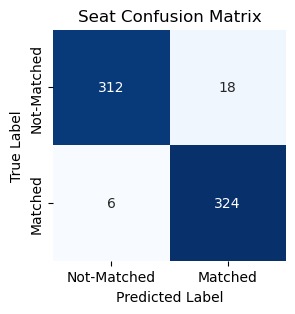

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 혼동행렬 시각화
plt.figure(figsize=(3, 3))
sns.heatmap(df, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Seat Confusion Matrix')
plt.show()

In [208]:
data_path_list = utils.path_finder("/home/yckim/research/ecg_id/dataset/icentia/processed_1/", ".npz")
corrupted_list = []
for data_path in data_path_list:
    temp_data = np.load(data_path, allow_pickle = True)["data"]
    if temp_data.shape[1] != 200:
        corrupted_list.append(data_path)

10241 paths are found


In [209]:
temp_data.shape[1]

200

In [201]:
import shutil

def delete_directories(file_paths):
    # 파일 경로에서 디렉토리 경로 추출
    directories = {os.path.dirname(file_path) for file_path in file_paths}
    
    # 디렉토리 삭제
    for directory in directories:
        if os.path.exists(directory):
            try:
                shutil.rmtree(directory)
                print(f"Deleted directory: {directory}")
            except Exception as e:
                print(f"Failed to delete {directory}: {e}")
        else:
            print(f"Directory does not exist: {directory}")

# 예시 파일 경로 리스트
file_paths = corrupted_list

# 디렉토리 삭제 실행
delete_directories(file_paths)

Deleted directory: /home/yckim/research/ecg_id/dataset/icentia/processed_1/07905
Deleted directory: /home/yckim/research/ecg_id/dataset/icentia/processed_1/09396
Deleted directory: /home/yckim/research/ecg_id/dataset/icentia/processed_1/08320
Deleted directory: /home/yckim/research/ecg_id/dataset/icentia/processed_1/04824
Deleted directory: /home/yckim/research/ecg_id/dataset/icentia/processed_1/04862
Deleted directory: /home/yckim/research/ecg_id/dataset/icentia/processed_1/10968
Deleted directory: /home/yckim/research/ecg_id/dataset/icentia/processed_1/07434
Deleted directory: /home/yckim/research/ecg_id/dataset/icentia/processed_1/07384
Deleted directory: /home/yckim/research/ecg_id/dataset/icentia/processed_1/09784
Deleted directory: /home/yckim/research/ecg_id/dataset/icentia/processed_1/05973
Deleted directory: /home/yckim/research/ecg_id/dataset/icentia/processed_1/02298
Deleted directory: /home/yckim/research/ecg_id/dataset/icentia/processed_1/03802
Deleted directory: /home/yck

In [197]:
data_path

'/home/yckim/research/ecg_id/dataset/icentia/processed_1/05519/05519.npz'

In [7]:
import numpy as np
import pandas as pd
import random
import pyarrow
import utils
from sklearn.utils import shuffle
import tqdm
import os


def build_dataset(template_n=20, **kwargs) -> np.array:
    """
    1. Calculate a template ECG segment using 'template_n' fragments
    2. Form dataset by collecting rest of individual ECG fragment which is labeled as 1.
    3. Form dataset by collecting other subjects ECG fragment which is labeled as 0.
    4. 
    """
    data_dict = kwargs['data_dict']
    dataset = []
    label = []
    random.seed(42)
    
    for target_indx in tqdm.tqdm(data_dict.keys(), desc=f"Loading {kwargs['desc']} dataset"):
        template_pulse = np.mean(data_dict[target_indx][:template_n], axis=0)
        target_pulses = data_dict[target_indx][template_n:]
    
        # Lable 1: matching pulse
        for i in range(len(target_pulses)):
            dataset.append([template_pulse, target_pulses[i]])
            label.append(1)
            
        # label 0: not matching pulse
        subjects = list(data_dict.keys())
        subjects.remove(target_indx)

        for i in range(len(target_pulses)):
            random_sub = random.choice(subjects)
            other_sub_data = data_dict[random_sub]
            random_data = random.choice(other_sub_data)
            dataset.append([template_pulse, random_data])
            label.append(0)

    print(f"Built {kwargs['desc']} dataset with {len(dataset)} samples")
    print(np.array(dataset).shape)
    dataset_array = np.swapaxes(np.array(dataset), 1, 2)
    return dataset_array, np.array(label)
    

def divide_subject(sub_list, data_list, **kwargs):
    """
    1. Subject wise grouping
    2. Train, validation, test split. 
        If you want to set ratio of train: validation: test, input data_ratio
    3. Result is dictionary, {'subject_number': [Index]}
    Future work, cross-validation
    """        
    if 'data_ratio' in kwargs:
        print(f"Ratio of Train, Validation, Test is set to {kwargs['data_ratio']}.")
        data_ratio = kwargs['data_ratio']
    else:
        print('Ratio of Train, Validation, Test is not set. This will be set as default, 7:2:1')
        data_ratio = [7,2,1]
    
    total_n = len(sub_list)
    train_n = data_ratio[0]*total_n//10
    val_n = data_ratio[1]*total_n//10
    test_n = total_n-train_n-val_n
    
    # Sorting -> maintaining train, val, test equally
    sub_list_sorted = [(i, val) for i, val in enumerate(sub_list)]
    sub_list_sorted.sort(key=lambda x: x[1])
    data_list_sorted = [data_list[i] for i, _ in sub_list_sorted]
    
    train_sub_list = sub_list_sorted[0:train_n]
    train_data_list = data_list_sorted[0:train_n]
    val_sub_list = sub_list_sorted[train_n:train_n+val_n]
    val_data_list = data_list_sorted[train_n:train_n+val_n]
    test_sub_list = sub_list_sorted[train_n+val_n:train_n+val_n+test_n]
    test_data_list = data_list_sorted[train_n+val_n:train_n+val_n+test_n]

    train_dict = {subject: data_list for subject, data_list in zip(train_sub_list, train_data_list)}
    val_dict = {subject: data_list for subject, data_list in zip(val_sub_list, val_data_list)}
    test_dict = {subject: data_list for subject, data_list in zip(test_sub_list, test_data_list)}
    
    print(f"Divided into train: {len(train_dict)}, val: {len(val_dict)}, test: {len(test_dict)}")
    return train_dict, val_dict, test_dict
    

def prep_dataset(**kwargs):
    data_list = []
    sub_name_list = []
    for data_path in kwargs['dataset_path_list']:
        dataset = np.load(data_path, allow_pickle=True)
        data = dataset["data"]
        label = os.path.splitext(os.path.split(data_path)[-1])[0]
        if len(data) > kwargs['min_data_cnt']:  # More than 100 data per patient remain
            data_list.append(data[:kwargs['min_data_cnt']])
            sub_name_list.append(label)
    
    # Subject wise division using filtered label (index)
    train_dict, val_dict, test_dict = divide_subject(sub_name_list, data_list)
    train_dataset, train_label = build_dataset(data_dict=train_dict, desc='train')
    val_dataset, val_label = build_dataset(data_dict=val_dict, desc='validation')
    test_dataset, test_label = build_dataset(data_dict=test_dict, desc='test')

    x_train, y_train = shuffle(train_dataset, train_label, random_state=0)
    x_val, y_val = shuffle(val_dataset, val_label, random_state=0)
    x_test, y_test = shuffle(test_dataset, test_label, random_state=0)

    dataset_dict = {'x_train': np.array(x_train), 'y_train': np.array(y_train),
                    'x_val': np.array(x_val), 'y_val': np.array(y_val),
                    'x_test': np.array(x_test), 'y_test': np.array(y_test)}

    print(f"Train data size: {len(dataset_dict['x_train'])}")
    print(f"Validation data size: {len(dataset_dict['x_val'])}")
    print(f"Test data size: {len(dataset_dict['x_test'])}")
    
    return dataset_dict

In [294]:
# Custom dataset txt to npz
origin_file_path_list = utils.path_finder("/home/yckim/research/ecg_id/dataset/sm/origin", ".txt")

base_save_dir = "/home/yckim/research/ecg_id/dataset/sm/raw"

for origin_file_path in origin_file_path_list:
    data = open(origin_file_path, 'r')
    file_name = os.path.splitext(os.path.basename(origin_file_path))[0]
    save_path = os.path.join(base_save_dir, file_name, file_name)
    utils.make_save_dir(save_path)
    
    seat_ecg_sig = []
    ref_ecg_sig = []
    
    lines = data.readlines()
    for element in lines:
        data_part = element.split('\t')
        seat_ecg_sig.append(float(data_part[0]))
        ref_ecg_sig.append(float(data_part[1]))
    
    seat_array = np.array(seat_ecg_sig)
    ref_array = np.array(ref_ecg_sig)
    
    np.savez(save_path, data=seat_array, reference=ref_array)

10 paths are found


In [ ]:
def triplet_loss(y_true, y_pred, alpha=0.2):
    anchor, positive, negative = y_pred[0], y_pred[1], y_pred[2]
    
    # Euclidean distance
    pos_dist = K.sqrt(K.sum(K.square(anchor - positive), axis=1))
    neg_dist = K.sqrt(K.sum(K.square(anchor - negative), axis=1))
    
    # Triplet Loss calculation
    loss = K.mean(K.maximum(pos_dist - neg_dist + alpha, 0.0))
    return loss

In [36]:
# transfer learning for steering wheel dataset
base_model = model
min_data_cnt = 50



Ratio of Train, Validation, Test is not set. This will be set as default, 7:2:1
Divided into train: 34, val: 9, test: 6


Loading train dataset: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:00<00:00, 13530.01it/s]


Built train dataset with 2040 samples
(2040, 2, 200)


Loading validation dataset: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 16688.21it/s]


Built validation dataset with 540 samples
(540, 2, 200)


Loading test dataset: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 11859.48it/s]

Built test dataset with 360 samples
(360, 2, 200)
Train data size: 2040
Validation data size: 540
Test data size: 360


In [44]:
base_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 200, 1)]             0         []                            
                                                                                                  
 input_3 (InputLayer)        [(None, 200, 1)]             0         []                            
                                                                                                  
 model (Functional)          (None, 200, 50)              5400      ['input_2[0][0]',             
                                                                     'input_3[0][0]']             
                                                                                                  
 lambda (Lambda)             (None, 200, 50)              0         ['model[0][0]',         

In [51]:
base_model = model
for i in range(len(base_model.layers)):
    base_model.layers[i].trainable = False
base_model.layers[9].trainable = True

new_model = base_model

In [59]:
# 모델 컴파일
new_model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

min_data_cnt = 50

# 데이터 준비 (예시)
dataset_dict = prepdataset.prep_dataset(dataset_path_list=data_path_list, min_data_cnt = min_data_cnt)

# 모델 학습
x_train_temp = dataset_dict.get('x_train')[:,:,:1]
x_train_targ = dataset_dict.get('x_train')[:,:,1:]
y_train = dataset_dict.get('y_train')

x_val_temp = dataset_dict.get('x_val')[:,:,:1]
x_val_targ = dataset_dict.get('x_val')[:,:,1:]
y_val = dataset_dict.get('y_val')

callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = new_model.fit(
        [x_train_temp, x_train_targ], 
        y_train,
        batch_size=16,
        verbose='auto',
        epochs=args.epochs,
        callbacks = [callback],
        validation_data=([x_val_temp, x_val_targ], y_val))
return model, history

Ratio of Train, Validation, Test is not set. This will be set as default, 7:2:1
Divided into train: 3, val: 1, test: 1


Loading train dataset: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 5570.12it/s]


Built train dataset with 180 samples
(180, 2, 200)


Loading validation dataset:   0%|                                                                                                                    | 0/1 [00:00<?, ?it/s]


IndexError: Cannot choose from an empty sequence

In [47]:
raw_data = np.load("/home/yckim/research/ecg_id/dataset/sw/raw/0902_hwson_sw/0902_hwson_sw.npz")['data']
resampled_raw_data = resample(raw_data[:10000], 1250)

In [ ]:
# template acquisition sequence
import ecg_prep

def build_dirs(proj_dir):
    template_data_dir = os.path.join(proj_dir, "data", "template")
    save_data_dir = os.path.join(proj_dir, "data", f"processed")
    return {"template_data_dir": template_data_dir, "save_data_dir": save_data_dir}


dir_dict = build_dirs("/home/yckim/research/ecg_id/dataset/sw/real_time_test/")
filter_params = {'lowcut':0.8, 'highcut':40, 'ripple':0.5, 'order':4}
ecg_preprocessor = ECGPreprocessor(filter_params = filter_params, dir_dict=dir_dict)
processed_sig = ecg_preprocessor.process(raw_ecg_sig = resampled_raw_data, dir_dict=dir_dict, filter_params=filter_params)
template_data_list = utils.path_finder(dir_dict['raw_data_dir'], '.npz')

temp_ecg = []
ecg_repo = []
flg = True
while flg:
    data = real_time_acq()
    ecg_prep.process_ecg_data()
    if processed_sig.shape[0] == 0:
        print('Retry')
    else:
        print('Go')